In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('数据科学实践Data/Grad-Line.xlsx')

In [3]:
def load_data(data):
    data = data.sample(frac=1)
    features = data.drop(columns=['No', 'Y house price of unit area']).values
    labels = data['Y house price of unit area'].values
    features = (features - features.mean(0)) / features.std(0)
    num_samples = features.shape[0]
    for i in range(num_samples):
        yield features[i], labels[i]

In [4]:
data_iter = load_data(data)

In [ ]:
def SGD(num_epochs, alpha, data_iter):
    W, b = np.random.uniform(-1, 1, (6, 1)), np.random.uniform(-1, 1)
    loss_list = []
    for _ in range(num_epochs):
        for X, y in data_iter:
            X = X.reshape(1, 6)
            y_hat = np.dot(X, W) + b
            mse = np.sum((y_hat - y) ** 2)
            dw = 2 * np.dot(X.T, y_hat - y)
            db = 2 * np.sum(y_hat - y)
            W -= alpha * dw
            b -= alpha * db
            loss_list.append(mse)
    return loss_list, W, b

In [6]:
loss_list, W, b = SGD(100, 0.01, data_iter)

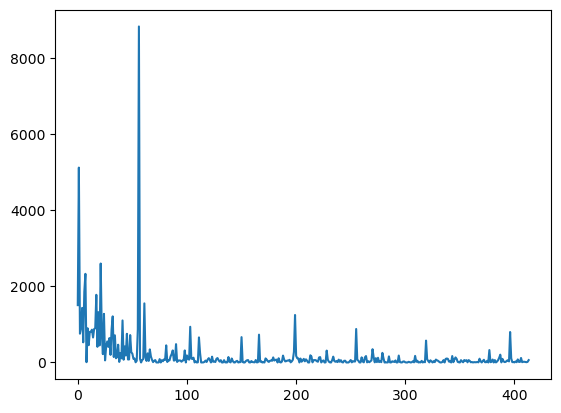

In [7]:
plt.plot(loss_list)

In [8]:
W, b

(array([[ 1.13103007],
        [-2.71055647],
        [-5.95548941],
        [ 4.43724791],
        [ 3.4279613 ],
        [ 0.46154289]]),
 37.86724527873862)

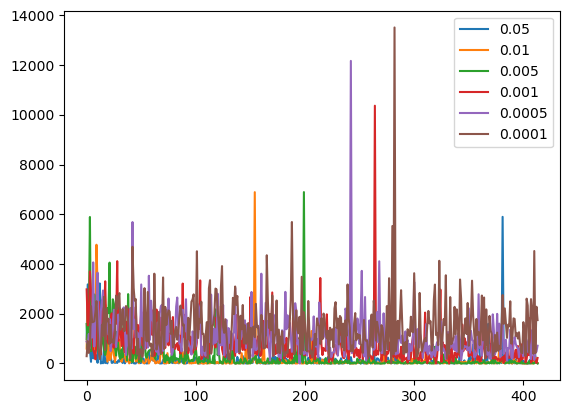

In [9]:
alpha_range = [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
list_ = []
for alpha in alpha_range:
    data_iter = load_data(data)
    list_.append(SGD(100, alpha, data_iter)[0])
for i, loss_list in enumerate(list_):
    plt.plot(loss_list, label=alpha_range[i])
plt.legend()
plt.show()

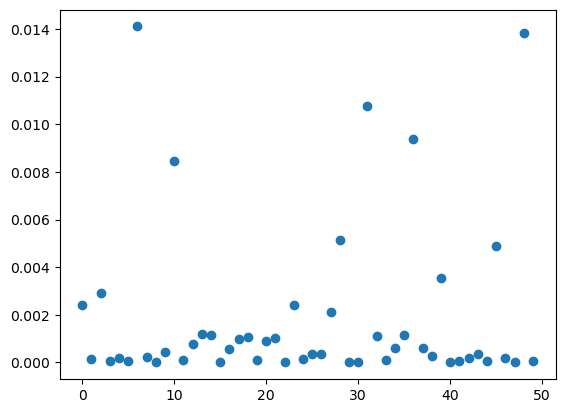

In [10]:
alpha, num_epochs = 0.005, 500
num_runs, list_ = 50, []
for _ in range(num_runs):
    data_iter = load_data(data)
    list_.append(SGD(num_epochs, alpha, data_iter)[0])

plt.scatter(list(range(num_runs)), [min(x) for x in list_])